# convolutional-neural-network

In [1]:
#import dependencies 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data mnist
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

In [3]:
#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [4]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [5]:
#implementing one hot encoding
y_train = tf.keras.utils.to_categorical(ytrain, num_classes=10)
y_test = tf.keras.utils.to_categorical(ytest, num_classes=10)


In [6]:
#creating model object & adding layers and forming the model
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(padding="same"),
    tf.keras.layers.Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"),
    tf.keras.layers.MaxPooling2D(padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")
    ])

In [7]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [8]:
#control panel
epochs = 10
NUM_EXAMPLES = 5
xtrain = xtrain[:NUM_EXAMPLES]
y_train = y_train[:NUM_EXAMPLES]

In [9]:
#training the model
history = model.fit(xtrain,y_train,batch_size=100,epochs= epochs,validation_data=(xtest,y_test))

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 2.2890 - accuracy: 0.0000e+00 - val_loss: 2.3492 - val_accuracy: 0.2537
Epoch 2/10
1/1 [==============================] - 6s 6s/step - loss: 1.5851 - accuracy: 1.0000 - val_loss: 2.7200 - val_accuracy: 0.2794
Epoch 3/10
1/1 [==============================] - 6s 6s/step - loss: 0.9079 - accuracy: 1.0000 - val_loss: 3.5707 - val_accuracy: 0.3264
Epoch 4/10
1/1 [==============================] - 6s 6s/step - loss: 0.3732 - accuracy: 1.0000 - val_loss: 4.7994 - val_accuracy: 0.3264
Epoch 5/10
1/1 [==============================] - 6s 6s/step - loss: 0.1046 - accuracy: 1.0000 - val_loss: 6.4046 - val_accuracy: 0.3103
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 8.2764 - val_accuracy: 0.3038
Epoch 7/10
1/1 [==============================] - 6s 6s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 10.3159 - val_accuracy: 0.3028
Epoch 8/10
1/1 [====================

In [10]:
#save the model
history.history

{'loss': [2.2889516353607178,
  1.5851024389266968,
  0.9079411625862122,
  0.3731759488582611,
  0.10459244251251221,
  0.023169197142124176,
  0.004483498632907867,
  0.0008230117382481694,
  0.0001565218553878367,
  3.2232957892119884e-05],
 'accuracy': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [2.349212408065796,
  2.7200398445129395,
  3.570734739303589,
  4.799415588378906,
  6.404590606689453,
  8.276355743408203,
  10.315912246704102,
  12.456765174865723,
  14.648815155029297,
  16.853105545043945],
 'val_accuracy': [0.25369998812675476,
  0.2793999910354614,
  0.3264000117778778,
  0.3264000117778778,
  0.31029999256134033,
  0.30379998683929443,
  0.3027999997138977,
  0.30160000920295715,
  0.3005000054836273,
  0.3012000024318695]}

In [11]:
# create the dataframe
df_history = pd.DataFrame()
df_history['accuracy']  = history.history['accuracy']
df_history['loss']      = history.history['loss']
df_history['val_accuracy'] = history.history['val_accuracy']
df_history['val_loss']  = history.history['val_loss']

df_history.to_csv("history.csv", index = False)

print(df_history.shape)
df_history.head()

(10, 4)


,accuracy,loss,val_accuracy,val_loss
0,0.0,2.288952,0.2537,2.349212
1,1.0,1.585102,0.2794,2.720040
2,1.0,0.907941,0.3264,3.570735
3,1.0,0.373176,0.3264,4.799416
4,1.0,0.104592,0.3103,6.404591


In [12]:
# defining visualization 
def plt_losses(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

def plt_accuracies(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation accuracy")
  ax.plot(x, ty, 'r', label="Train accuracy")
  plt.legend() 
  plt.grid()
  fig.canvas.draw()



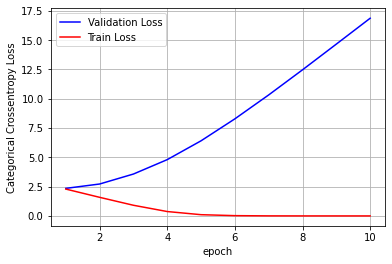

In [13]:
# visualization of loss
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_losses(x, vy, ty, ax)

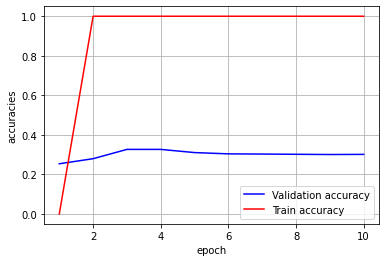

In [14]:
# visualization of accuracy
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracies')
x = list(range(1,epochs+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_accuracies(x, vy, ty, ax)